In [24]:
import sqlite3
import pandas as pd

In [25]:
conn = sqlite3.connect('C://Users//akhil//Desktop//HAP 880//Week 2//testclaims_hu.db')

In [26]:
df = pd.read_sql('select * from highUtilizationPredictionV2wco', conn)

In [27]:
df=df.join(pd.get_dummies(df.race))

In [28]:
df.head()

,index,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,...,drugs_m11-12,HighUtilizationY2,claimCount,A,Am.N,B,H,O,U,W
0,0,B,71,PAT136597,0,0,0,0,0,1,...,1,1,160,0,0,1,0,0,0,0
1,1,A,86,PAT119838,0,0,0,0,0,0,...,0,0,24,1,0,0,0,0,0,0
2,2,W,70,PAT11289,1,0,0,0,0,0,...,0,0,52,0,0,0,0,0,0,1
3,3,W,75,PAT178745,0,0,0,0,1,0,...,0,0,15,0,0,0,0,0,0,1
4,4,W,77,PAT50922,0,0,0,0,1,0,...,4,0,66,0,0,0,0,0,0,1


In [29]:
cols=list(df.columns)

In [30]:
cols.remove('index')
cols.remove('race')
cols.remove('patient_id')
cols.remove('HighUtilizationY2')
cols.remove('claimCount')

In [31]:
sz=df.index.size

In [32]:
from sklearn.utils import shuffle
df=shuffle(df)

In [33]:
import numpy as np
rnd=np.random.rand(1,sz)
df['rnd']=list(rnd[0])
df=df.sort_values('rnd')

In [34]:
tr=df[:int(sz*0.8)] # split to training and testing
ts=df[int(sz*0.8):] # testing

In [35]:
#Random Forest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()

In [38]:
rf.fit(tr[cols], tr['HighUtilizationY2'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
probs_rf = rf.predict_proba(ts[cols])

In [17]:
res = pd.DataFrame()

In [18]:
res['HighUtilizationY2'] = ts['HighUtilizationY2']

In [19]:
res['rf'] = probs_rf[:,1]

In [20]:
res.head()

,HighUtilizationY2,rf
85042,0,0.100000
1173,1,0.800000
53690,0,0.000000
110054,0,0.000000
85618,0,0.100000
70527,0,0.000000
78255,0,0.200000
37277,0,0.000000
63459,1,0.900000
40798,0,0.200000


In [43]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [22]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(res['HighUtilizationY2'] , res['rf'])

In [23]:
auc_rf = auc(fpr_rf ,tpr_rf)

In [24]:
print(auc_rf)

0.7411870884280068


In [25]:
rf10=RandomForestClassifier(n_estimators=10)
rf10.fit(tr[cols],tr['HighUtilizationY2'])
probs_rf10=rf10.predict_proba(ts[cols])
fpr_rf10, tpr_rf10, thresholds_rf10 = roc_curve(ts['HighUtilizationY2'],probs_rf10[:,1])
auc_rf10=auc(fpr_rf10,tpr_rf10)
print(auc_rf10)

0.7403277269293377


In [26]:
rf200=RandomForestClassifier(n_estimators=200)
rf200.fit(tr[cols],tr['HighUtilizationY2'])
probs_rf200=rf200.predict_proba(ts[cols])
fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
auc_rf200=auc(fpr_rf200,tpr_rf200)
print(auc_rf200)

0.8018654035113129


In [27]:
rf500=RandomForestClassifier(n_estimators=500)
rf500.fit(tr[cols],tr['HighUtilizationY2'])
probs_rf500=rf500.predict_proba(ts[cols])
fpr_rf500, tpr_rf500, thresholds_rf500 = roc_curve(ts['HighUtilizationY2'],probs_rf500[:,1])
auc_rf500=auc(fpr_rf500,tpr_rf500)
print(auc_rf500)

0.8036768222733175


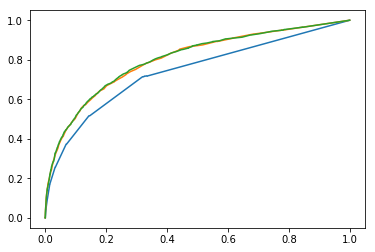

In [29]:
from matplotlib import pyplot as plt
plt.plot(fpr_rf10, tpr_rf10)
#plt.plot(fpr_rf100, tpr_rf100)
plt.plot(fpr_rf200, tpr_rf200)
plt.plot(fpr_rf500, tpr_rf500)
plt.show()

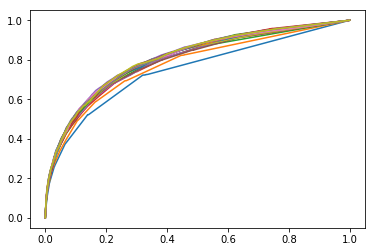

In [48]:
rf = dict()
probs_rf = dict()
fpr_rf = dict()
tpr_rf = dict() 
thresholds_rf = dict()
auc_rf = dict()
for n in range(10, 200, 10):
    rf[n]=RandomForestClassifier(n_estimators =n)
    rf[n].fit(tr[cols],tr['HighUtilizationY2'])
    probs_rf[n]=rf[n].predict_proba(ts[cols])
    fpr_rf[n], tpr_rf[n], thresholds_rf[n] = roc_curve(ts['HighUtilizationY2'],probs_rf[n][:,1])
    auc_rf[n]=auc(fpr_rf[n],tpr_rf[n])
    plt.plot(fpr_rf[n], tpr_rf[n])